In [1]:
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys
import time

start_time = time.time()

inbinfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/genepromdelta.7/Randomforest/developing/realtrainingtable/BL14_genepromSM_0.7.txt_REALTEST_bestref.txt_result_dupindex_binnedstats.pkl_totalformatteddata.pkl'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_pickle(inbinfile)
scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']

###########inbindf=inbindf.reset_index()
inbindf.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,label,Last,label2,deltaMedian,deltaMean
0,CD4.HWI-7001432L_73:1:1301:17083:62471#12,0.740282,0.736333,-0.280282,-0.116949,-0.260179,-0.260538,0.168795,-0.280282,-0.268436,...,0.740282,CD4-others,0.740282,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:1301:17083:62471#12,CD4,-0.207500,3.965082e-18
1,CD4.HWI-7001432L_73:1:2103:15384:27344#12,1.470244,1.029782,-0.478269,-0.078731,-0.474679,-0.252833,-0.105295,-0.336474,-0.349756,...,1.470244,CD4-others,1.470244,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:2103:15384:27344#12,CD4,-0.236141,-7.137148e-17
2,CD4.HWI-7001432L_74:1:1215:11529:42195#12,0.794564,0.657436,-0.185795,-0.150615,-0.164256,-0.154564,-0.022462,-0.185436,-0.093000,...,0.794564,CD4-others,0.794564,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_74:1:1215:11529:42195#12,CD4,-0.151692,-4.956353e-17
3,CD4.HWI-ST1450_140:1:1307:21239:47394#12,0.757333,0.385795,-0.280103,-0.205436,-0.235231,-0.211897,0.096821,-0.245282,-0.280103,...,0.757333,CD4-others,0.378667,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:1307:21239:47394#12,CD4,-0.164154,1.784287e-17
4,CD4.HWI-ST1450_140:1:2215:5251:69917#12,0.738205,-0.133744,-0.264769,-0.271949,-0.237487,-0.201590,0.289128,-0.217744,-0.234795,...,0.738205,CD4-others,0.738205,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:2215:5251:69917#12,CD4,-0.204103,-3.965082e-18


In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,label,Last,label2,deltaMedian,deltaMean
0,CD4.HWI-7001432L_73:1:1301:17083:62471#12,0.740282,0.736333,-0.280282,-0.116949,-0.260179,-0.260538,0.168795,-0.280282,-0.268436,...,0.740282,CD4-others,0.740282,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:1301:17083:62471#12,CD4,-0.207500,3.965082e-18
1,CD4.HWI-7001432L_73:1:2103:15384:27344#12,1.470244,1.029782,-0.478269,-0.078731,-0.474679,-0.252833,-0.105295,-0.336474,-0.349756,...,1.470244,CD4-others,1.470244,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:2103:15384:27344#12,CD4,-0.236141,-7.137148e-17
2,CD4.HWI-7001432L_74:1:1215:11529:42195#12,0.794564,0.657436,-0.185795,-0.150615,-0.164256,-0.154564,-0.022462,-0.185436,-0.093000,...,0.794564,CD4-others,0.794564,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_74:1:1215:11529:42195#12,CD4,-0.151692,-4.956353e-17
3,CD4.HWI-ST1450_140:1:1307:21239:47394#12,0.757333,0.385795,-0.280103,-0.205436,-0.235231,-0.211897,0.096821,-0.245282,-0.280103,...,0.757333,CD4-others,0.378667,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:1307:21239:47394#12,CD4,-0.164154,1.784287e-17
4,CD4.HWI-ST1450_140:1:2215:5251:69917#12,0.738205,-0.133744,-0.264769,-0.271949,-0.237487,-0.201590,0.289128,-0.217744,-0.234795,...,0.738205,CD4-others,0.738205,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:2215:5251:69917#12,CD4,-0.204103,-3.965082e-18


In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,maxscore,deltabasedfragassignment,filename,label,Last,label2,deltaMedian,deltaMean,secondmaxScore,secondmaxScoreCT
0,CD4.HWI-7001432L_73:1:1301:17083:62471#12,0.740282,0.736333,-0.280282,-0.116949,-0.260179,-0.260538,0.168795,-0.280282,-0.268436,...,0.740282,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:1301:17083:62471#12,CD4,-0.207500,3.965082e-18,Notassigned,Notassigned
1,CD4.HWI-7001432L_73:1:2103:15384:27344#12,1.470244,1.029782,-0.478269,-0.078731,-0.474679,-0.252833,-0.105295,-0.336474,-0.349756,...,1.470244,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:2103:15384:27344#12,CD4,-0.236141,-7.137148e-17,Notassigned,Notassigned
2,CD4.HWI-7001432L_74:1:1215:11529:42195#12,0.794564,0.657436,-0.185795,-0.150615,-0.164256,-0.154564,-0.022462,-0.185436,-0.093000,...,0.794564,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_74:1:1215:11529:42195#12,CD4,-0.151692,-4.956353e-17,Notassigned,Notassigned
3,CD4.HWI-ST1450_140:1:1307:21239:47394#12,0.757333,0.385795,-0.280103,-0.205436,-0.235231,-0.211897,0.096821,-0.245282,-0.280103,...,0.378667,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:1307:21239:47394#12,CD4,-0.164154,1.784287e-17,Notassigned,Notassigned
4,CD4.HWI-ST1450_140:1:2215:5251:69917#12,0.738205,-0.133744,-0.264769,-0.271949,-0.237487,-0.201590,0.289128,-0.217744,-0.234795,...,0.738205,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:2215:5251:69917#12,CD4,-0.204103,-3.965082e-18,Notassigned,Notassigned


In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,filename,label,Last,label2,deltaMedian,deltaMean,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg
0,CD4.HWI-7001432L_73:1:1301:17083:62471#12,0.740282,0.736333,-0.280282,-0.116949,-0.260179,-0.260538,0.168795,-0.280282,-0.268436,...,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:1301:17083:62471#12,CD4,-0.207500,3.965082e-18,0.736333,CD8-others,0.00394872,0.372115
1,CD4.HWI-7001432L_73:1:2103:15384:27344#12,1.470244,1.029782,-0.478269,-0.078731,-0.474679,-0.252833,-0.105295,-0.336474,-0.349756,...,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_73:1:2103:15384:27344#12,CD4,-0.236141,-7.137148e-17,1.02978,CD8-others,0.440462,0.955353
2,CD4.HWI-7001432L_74:1:1215:11529:42195#12,0.794564,0.657436,-0.185795,-0.150615,-0.164256,-0.154564,-0.022462,-0.185436,-0.093000,...,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-7001432L_74:1:1215:11529:42195#12,CD4,-0.151692,-4.956353e-17,0.657436,CD8-others,0.137128,0.465846
3,CD4.HWI-ST1450_140:1:1307:21239:47394#12,0.757333,0.385795,-0.280103,-0.205436,-0.235231,-0.211897,0.096821,-0.245282,-0.280103,...,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:1307:21239:47394#12,CD4,-0.164154,1.784287e-17,0.564205,m4-others,-0.185538,0.0965641
4,CD4.HWI-ST1450_140:1:2215:5251:69917#12,0.738205,-0.133744,-0.264769,-0.271949,-0.237487,-0.201590,0.289128,-0.217744,-0.234795,...,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST1450_140:1:2215:5251:69917#12,CD4,-0.204103,-3.965082e-18,0.719359,Tr-others,0.0188462,0.378526


In [7]:
allassigned.columns

Index(['index', 'CD4-others', 'CD8-others', 'nB-others', 'NK-others',
       'Mn-others', 'mNeu-others', 'm8-others', 'DC-others', 'Eo-others',
       'Tr-others', 'm4-others', 'Mg-others', 'Er-others', 'mB-others',
       'LENhypoCpG', 'LENhyperCpG', 'total_cpg', 'LENhypoCpG_BY_total_cpg',
       'maxscoredCT_beforeCpGweight', 'maxscore_beforeCpGweight',
       'maxscoredCT', 'maxscore', 'deltabasedfragassignment', 'filename',
       'label', 'Last', 'label2', 'deltaMedian', 'deltaMean', 'secondmaxScore',
       'secondmaxScoreCT', 'adjustedScore_minus', 'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:




def calculate_metrics(currentgroup,currentmethods):
    for name, group in currentgroup:
   
        celltype=name.replace('-others','')





        y=(group['index'].str.contains(celltype)).astype(int) 


        for method in currentmethods:

            pred=(group[method]).to_numpy()


            fpr, tpr, thresholds=metrics.roc_curve(y,pred,pos_label=1)


            tempAUC=metrics.auc(fpr, tpr)

            celltypeAUC[celltype]=celltypeAUC[celltype]+[tempAUC]

            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            celltypeoptcutpoint[celltype]=celltypeoptcutpoint[celltype]+[optimal_threshold]

In [13]:



celltypeAUC=defaultdict(list)
celltypeoptcutpoint=defaultdict(list)


allassignedgrouped=allassigned.groupby('deltabasedfragassignment')


methods=['maxscore','adjustedScore_minus','adjustedScore_minus_avg','LENhypoCpG','LENhypoCpG_0.5','LENhypoCpG_0.8']

calculate_metrics(allassignedgrouped,methods)




In [14]:
celltypeAUCdf=pd.DataFrame.from_dict(celltypeAUC, orient='index',columns=methods)
celltypeAUCdf.index.name = 'Celltype'
celltypeAUCdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.783038,0.770746,0.782222,0.775069,0.775578,0.777153
CD8,0.988187,0.967308,0.981044,0.971291,0.982967,0.982967
DC,0.933646,0.938376,0.940080,0.925613,0.927804,0.933646
Eo,0.995344,0.990688,0.991762,0.983256,0.985226,0.985226
Er,0.949562,0.958509,0.957142,0.945608,0.947712,0.944023


In [15]:
celltypeoptcutpointdf=pd.DataFrame.from_dict(celltypeoptcutpoint, orient='index',columns=methods)
celltypeoptcutpointdf.index.name = 'Celltype'
celltypeoptcutpointdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.378667,0.003949,0.092799,1.0,1.0,1.0
CD8,0.794962,0.019026,0.494404,1.0,1.0,1.0
DC,0.885615,0.030513,0.459827,1.0,1.0,1.0
Eo,0.957910,0.932256,0.947410,1.0,1.0,1.0
Er,0.478917,0.476538,0.500231,1.0,1.0,1.0


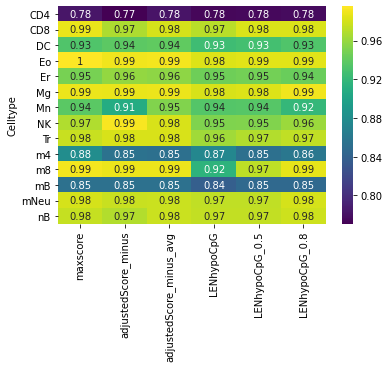

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(celltypeAUCdf, annot=True,cmap='viridis')
plt.savefig(outfile+"_Allheyper"+str(consideringALLheyper)+"_AUC.pdf",bbox_inches = "tight")

In [17]:
celltypeAUCdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_AUC.txt",sep="\t")
celltypeoptcutpointdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_Cutpoint.txt",sep="\t")

In [18]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)


1.6211090087890625
